## Handling Missing Value


In [4]:
import seaborn as sns

In [8]:
df = sns.load_dataset('titanic')

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
df.shape

(891, 15)

In [17]:
## dropping column
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


##  1. Mean Value Imputation
mean imputation works well when we have normally distributed data

<AxesSubplot:xlabel='age', ylabel='Count'>

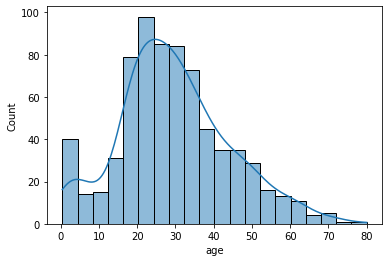

In [18]:
sns.histplot(df['age'],kde=True)

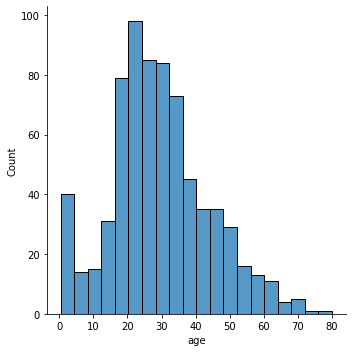

In [20]:
sns.displot(df['age'])

In [22]:
df['Age_Mean']= df['age'].fillna(df['age'].mean())

In [24]:
df[['Age_Mean','age']]

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


## 2. Median Value imputation
if we have outliers in the dataset

In [26]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [27]:
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


## Mode Imputation Technique 
This can be used for Categorical Value

In [29]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [30]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [36]:
mode_value =df[df['embarked'].notna()]['embarked'].mode()[0]

In [37]:
mode_value

'S'

In [39]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S


In [44]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [45]:
df['embarked_mode'].isnull().sum()

0

## Random Sample imputation
Random simple imputation is a categorical technique which we can apply on categorical as well as numerical data.

In [47]:
df.isnull().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
Age_Mean           0
age_median         0
embarked_mode      0
dtype: int64

In [48]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [49]:
non_missing_towns = df['embark_town'].dropna().unique()

In [52]:
import numpy as np
import pandas as pd

df['embark_town'] = df['embark_town'].apply(lambda x: np.random.choice(non_missing_towns) if pd.isna(x) else x)

In [53]:
df['embark_town'].isnull().sum()

0